In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

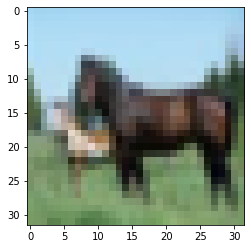

In [6]:
plt.imshow(X_train[12])

In [8]:
y_train[12]

array([7], dtype=uint8)

In [9]:
X_train[0].max()

255

In [10]:
X_train = X_train/255

In [11]:
X_test = X_test/255

In [12]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
#y_train

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train,10)

In [16]:
y_cat_train[12]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [48]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 128)         131200    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [52]:
model.fit(X_train,y_cat_train,validation_data=(X_test,y_cat_test),callbacks=[early_stop],epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 33s 658us/sample - loss: 1.5540 - acc: 0.4269 - val_loss: 1.2580 - val_acc: 0.5492
Epoch 2/15
50000/50000 [==============================] - 34s 680us/sample - loss: 1.1610 - acc: 0.5891 - val_loss: 1.0943 - val_acc: 0.6158
Epoch 3/15
50000/50000 [==============================] - 32s 649us/sample - loss: 0.9977 - acc: 0.6494 - val_loss: 1.0414 - val_acc: 0.6370 ETA: 3s - ETA: 1s - loss: 0.9983 - acc:  - ETA: 1s - loss: 0.99 - ETA: 0s - loss: 0.9973 - acc: 0.6
Epoch 4/15
50000/50000 [==============================] - 31s 616us/sample - loss: 0.8827 - acc: 0.6912 - val_loss: 0.9936 - val_acc: 0.66235s  - ETA: 11s - los
Epoch 5/15
50000/50000 [==============================] - 32s 634us/sample - loss: 0.7888 - acc: 0.7238 - val_loss: 0.9484 - val_acc: 0.67402 - ETA: 15s - loss: 0.7758 - acc - ETA: 15s - loss: 0.7760 - acc: 0. - ETA - ETA - ETA: 7s - loss: 0.7815 - a - ETA: 7s - los

In [53]:
metrics = pd.DataFrame(model.history.history)

In [54]:
metrics.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

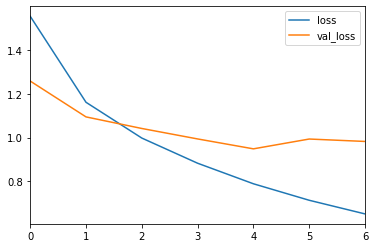

In [55]:
metrics[['loss','val_loss']].plot()

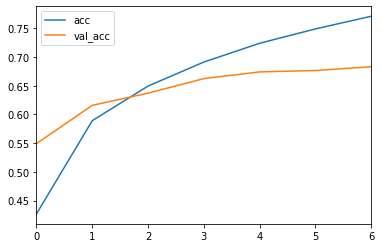

In [56]:
metrics[['acc','val_acc']].plot()

In [57]:
metrics

,loss,acc,val_loss,val_acc
0,1.554043,0.42688,1.258014,0.5492
1,1.161045,0.58910,1.094280,0.6158
2,0.997659,0.64936,1.041406,0.6370
3,0.882690,0.69116,0.993632,0.6623
4,0.788846,0.72380,0.948366,0.6740
5,0.713477,0.74882,0.993211,0.6764
6,0.651144,0.77084,0.982151,0.6830


In [58]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.9821513043403626, 0.683]

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
predictions = model.predict_classes(X_test)

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1000
           1       0.82      0.80      0.81      1000
           2       0.58      0.60      0.59      1000
           3       0.48      0.53      0.50      1000
           4       0.64      0.64      0.64      1000
           5       0.52      0.63      0.57      1000
           6       0.82      0.72      0.77      1000
           7       0.76      0.73      0.74      1000
           8       0.85      0.73      0.78      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000



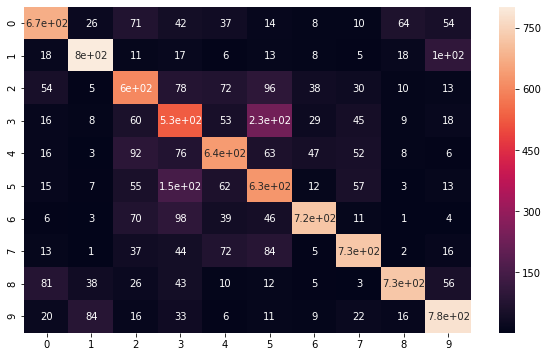

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [63]:
my_img = X_test[16]

In [64]:
my_img

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

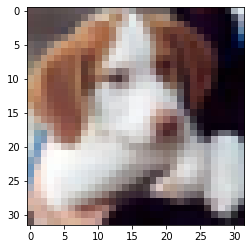

In [65]:
plt.imshow(my_img)

In [66]:
y_test[16] # it means a dog

array([5])

In [67]:
p = model.predict_classes(my_img.reshape(1,32,32,3))

In [68]:
p

array([5], dtype=int64)

In [69]:
# hurrey !!